# <center>Machine Intelligence 1</center>

<h2 align="right">Exercise Sheet 02</h2> 

<pre style="text-align: right">
Gruppe:             
                MeSi
Autoren:            
Jens Meiners
Arne Siebenmorgen
</pre>

### 2.1 Terminology (2 points)

###### a) 

With a nonlinear transferfunction a connectionist neuron is able to compute nonlinear functions. Furthermore every MLP with a linear transferfunction is equivalent to a single-layer network. Thus complex nonlinear behaviour of the neural network can only be achived with a nonlinear transferfunction.

###### b) 

Without the bias the transferfunction can only be changed in its steepness, but not translated on the x-axis. The bias is able to translate the output.

The bias allows to create a single connectionist neuron, that represents primitive boolean functions like AND, OR, NAND.

###### c) 

Point and edge filters are linear filters used in image processing, to deteced points i.e. edges.

###### d) 

The *connectionist neuron* with a *logistic transfer function* returns the same output for the same input every time. It is deterministic. While a *stochastic neuron* is not. With multiplying the linear combination of inputs with a random pertubation, the *stochastic neuron* returns slightly different outputs for the same input. 

### 2.2 Finding Parameters of a Connectionist Neuron (5 points)

###### a) Plot the Data

In [1]:
# load the data into a numpy array
import numpy as np
from numpy import genfromtxt

data = genfromtxt('applesOranges.csv', delimiter=',', skip_header=1)
print 'data.shape:',data.shape
x1,x2,y = data[:,0],data[:,1],data[:,2]
print 'x1.shape:  ',x1.shape

data.shape: (200, 3)
x1.shape:   (200,)


In [2]:
# start plotting
%matplotlib inline

import matplotlib.pyplot as plt

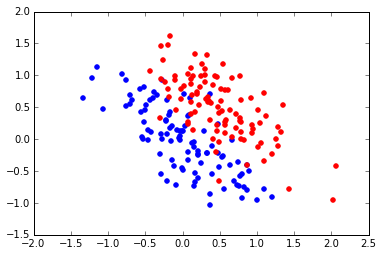

In [3]:
plt.scatter(x1[y==0], x2[y==0],color='blue')
plt.scatter(x1[y==1], x2[y==1],color='red')

###### b)

find $w_\alpha$ using $\vec a \cdot \vec b = \|\vec a\|\, \|\vec b\|\,\cos\sphericalangle(\vec a, \vec b)$.
with $\alpha$ being the angle between $w_\alpha$ and $\left(\begin{array}{c}1\\0\\\end{array}\right)$. <br>
also $\|\vec w_\alpha\| = \|\left(\begin{array}{c}1\\0\\\end{array}\right)\| = 1$<br>
for $\left(\begin{array}{c}w_1\\w_2\\\end{array}\right) = w_\alpha$ <br>
define $w_1 = cos(\alpha)$ using the constraint that we rotate counter-clockwise<br>
and therefor: $w_2 = \sqrt{1 - w_1^2}$

In [4]:
def get_w(alpha):
    w1 = np.cos(np.radians(alpha))
    w = np.array([w1, \
                  np.sqrt(1-np.power(w1,2))])
    return w

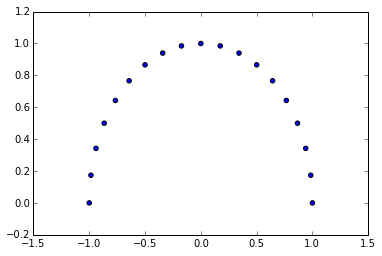

In [43]:
alpha = np.arange(0,181,10)
w = get_w(alpha)
plt.scatter(w[0],w[1])

For each $w_\alpha$ calculate the percentage of correct classifications $p$.

In [68]:
def f(x,w,theta):
    return np.sign(w.T.dot(x) - theta)

# f(x) predicts the classes -1 and 1. transform y accordingly
y[y==0] = -1

# the result ot the classifications is a boolean array that python neatly sums up for us.
# afterwards devide by 200 and multiply by 100 to result in percentage
p = (f([x1,x2],w,0) == y).sum(1) / 2
print p
print 'maximum percentage is reached at ',str(alpha[np.argmax(p)])+'° with',max(p),'%'

[67 70 76 74 71 73 75 75 72 69 63 60 56 52 50 46 42 35 32]
maximum percentage is reached at  20° with 76 %


plot $p$ corresponding to $\alpha$

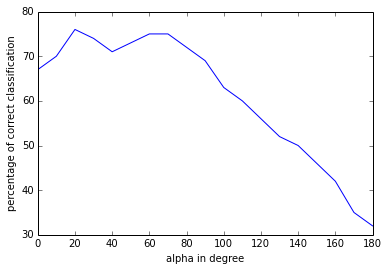

In [69]:
plt.plot(alpha,p)
plt.xlabel('alpha in degree')
plt.ylabel('percentage of correct classification')

###### c)

vary $\theta \in [-3,3]$ and find the best value for prediction

In [70]:
best_w = w[:,np.argmax(p)]

In [75]:
thetas = np.arange(-3,3.1,0.1)

p = [(f([x1,x2],best_w,theta) == y).sum() / 2 for theta in thetas]
print p
best_theta = thetas[np.argmax(p)]
print 'maximum percentage is reached at theta ',best_theta,' with',max(p),'%'

[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 52, 52, 57, 61, 65, 69, 76, 77, 79, 78, 76, 75, 73, 68, 64, 62, 57, 55, 53, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
maximum percentage is reached at theta  0.2  with 79 %


###### d)

In [76]:
# predictions using the best parameters
pred = f([x1,x2],best_w,best_theta)

(200,)


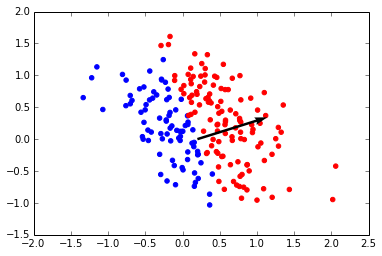

In [81]:
plt.scatter(x1[pred==-1], x2[pred==-1],color='blue')
plt.scatter(x1[pred==1], x2[pred==1],color='red')

soa =np.array( [ [best_theta,0,best_w[0],best_w[1]] ]) 
X,Y,U,V = zip(*soa)
ax = plt.gca()
ax.quiver(X,Y,U,V,angles='xy',scale_units='xy',scale=1)

The vector plotted is $w$ transposed about $\theta$ to match the decision boudry. the line that is $w^\top x - \theta$ is the actual <b>linear</b> dicision boundry. Because of this, the two classes seem to be seperated quite well in this plot. Comparing the first plot of the datapoints with this one makes clear, that there are datapoints near the decision boundry that are classified wrong. This simply boils down to the fact that the actual dataset can not be seperated by a linear function. The line we found is the best a function like this can do according our process. The next plot tries to visualize that even clearer.

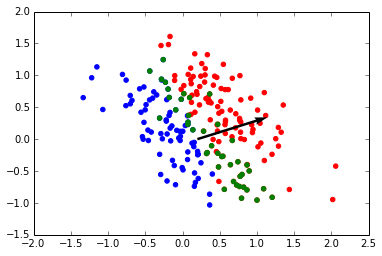

In [93]:
plt.scatter(x1[pred==-1], x2[pred==-1],color='blue')
plt.scatter(x1[pred==1], x2[pred==1],color='red')
plt.scatter(x1[pred!=y], x2[pred!=y],color='green')

soa =np.array( [ [best_theta,0,best_w[0],best_w[1]] ]) 
X,Y,U,V = zip(*soa)
ax = plt.gca()
ax.quiver(X,Y,U,V,angles='xy',scale_units='xy',scale=1)

In this plot, the datapoints marked green are the ones that are still classified wrong. It can be seen that these are the ones that could not be seperated by a linear classification.

###### e)

In [100]:
# test every combination of values
p = np.array([(f([x1,x2],w,theta) == y).sum(1) / 2 for theta in thetas])
print p.shape

(61, 19)


$p$ is a matrix $(\# theta \times \# w_\alpha)$

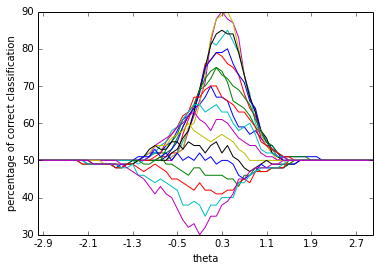

In [160]:
test = plt.plot(p)

indices = np.arange(1,61,8)
labels = [str(theta) for theta in thetas[indices]]
plt.xticks(indices, labels)
plt.xlabel('theta')
plt.ylabel('percentage of correct classification')
plt.show()

This plot shows the correct classification percentage for every $w_\alpha$. 

In [132]:
max_index = np.unravel_index(p.argmax(),p.shape)
print 'theta #'+str(max_index[0])+' - w #'+str(max_index[1])
print 'theta: '+str(thetas[max_index[0]])+' - w: '+str(w[:,max_index[1]])+' - corresponding alpha: '+str(alpha[max_index[1]])+'°'
print 'correct classifications: '+str(p[max_index])+'%'

theta #33 - w #4
theta: 0.3 - w: [ 0.76604444  0.64278761] - corresponding alpha: 40°
correct classifications: 90%


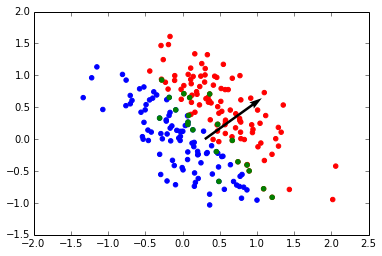

In [130]:
# predictions using the best parameters
pred = f([x1,x2],w[:,max_index[1]],thetas[max_index[0]])

plt.scatter(x1[pred==-1], x2[pred==-1],color='blue')
plt.scatter(x1[pred==1], x2[pred==1],color='red')
plt.scatter(x1[pred!=y], x2[pred!=y],color='green')

soa =np.array( [ [thetas[max_index[0]],0,w[:,max_index[1]][0],w[:,max_index[1]][1]] ]) 
X,Y,U,V = zip(*soa)
ax = plt.gca()
ax.quiver(X,Y,U,V,angles='xy',scale_units='xy',scale=1)

### 2.3 Multi Layer Perceptrons (3 points)

###### a)

A Multi Layer Perceptron can distinguish non linear data, while a single perceptron cannot. A simple example is the XOR function. A single neuron cannot model this function, while Multi Layer Perceptron with just one hidden layer can.

###### b)

In [4]:
class mlp:

    def __init__(self,hiddenUnits, lower, upper):
        self.hiddenUnits = hiddenUnits
        self.a = np.random.normal(lower,upper,hiddenUnits)
        self.b = np.random.uniform(-2,2,hiddenUnits)
        self.w = np.random.normal(0,1,hiddenUnits)
    
    def getOutput(self,x):
        sum = 0
        for i in range(1,self.hiddenUnits):
            sum += self.w[i]*np.tanh(self.a[i]*(x-self.b[i]))
        return sum
    
    def getOutputArray(self,x):
        result = np.empty(x.size)
        for i in range(1,x.size):
            result[i] = self.getOutput(x[i])
        return result
            

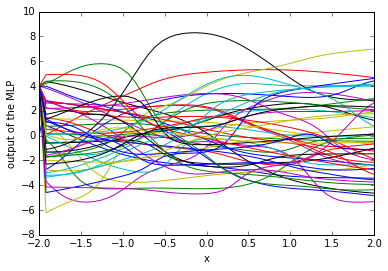

mean error 7.59292993221


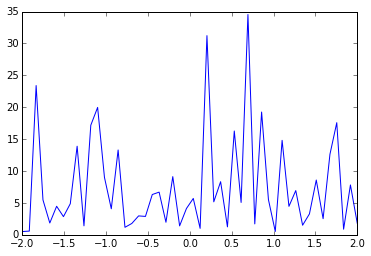

In [59]:
x = np.linspace(-2.0,2.0)
test_function = -x

error = np.zeros((len(x), 50))

output = np.zeros((len(x), 50))

for i in range(0,50):
    mlp1 = mlp(10,0,2)
    
    error[:,i] = (mlp1.getOutputArray(x)-test_function)**2
    output[:,i] = mlp1.getOutputArray(x)

plt.plot(x,output)  
plt.xlabel("x")
plt.ylabel("output of the MLP")
plt.show()
mean_error = 1.0/len(error)*error.sum(axis=0)

plt.plot(x, mean_error)

print "mean error",np.mean(mean_error)


#### c)

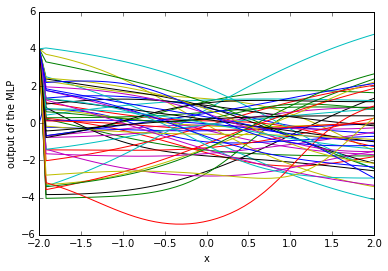

mean error 3.55486603115


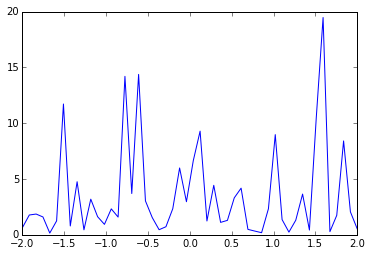

In [58]:
x = np.linspace(-2.0,2.0)
test_function = -x

error = np.zeros((len(x), 50))

output = np.zeros((len(x), 50))

for i in range(0,50):
    mlp1 = mlp(10,0.0,0.5)   
    error[:,i] = (mlp1.getOutputArray(x)-test_function)**2
    output[:,i] = mlp1.getOutputArray(x)

plt.plot(x,output)  
plt.xlabel("x")
plt.ylabel("output of the MLP")
plt.show()
mean_error = 1.0/len(error)*error.sum(axis=0)

plt.plot(x, mean_error)

print "mean error",np.mean(mean_error)


With a smaller range for $a_i$ the model of the MLP becomes less complex. And the range of the output decreases.